In [1]:
import os
os.environ['R_HOME'] = '/usr/lib/R'
import pandas as pd
import palantir
import matplotlib.pyplot as plt

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


In [2]:
auc=pd.read_csv("scenic/output/auc_mtx_mm10.csv",index_col=0)

In [3]:
dm_res = palantir.utils.run_diffusion_maps(auc,knn=50)

Determing nearest neighbor graph...


In [4]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

In [5]:
ms_data=pd.read_csv("ms_data_auc.csv",index_col=0)
#ms_data.to_csv("ms_data_auc.csv")

In [7]:
from cuml.manifold import UMAP

In [11]:
umap = UMAP(n_components = 2,n_neighbors=150,min_dist=.4,n_epochs=2000)
emb = umap.fit_transform(ms_data.values)

emb=pd.read_csv("UMAP_Glia_auc.csv",index_col=0).values
#pd.DataFrame(emb,index=ms_data.index).to_csv("UMAP_Glia_auc.csv")


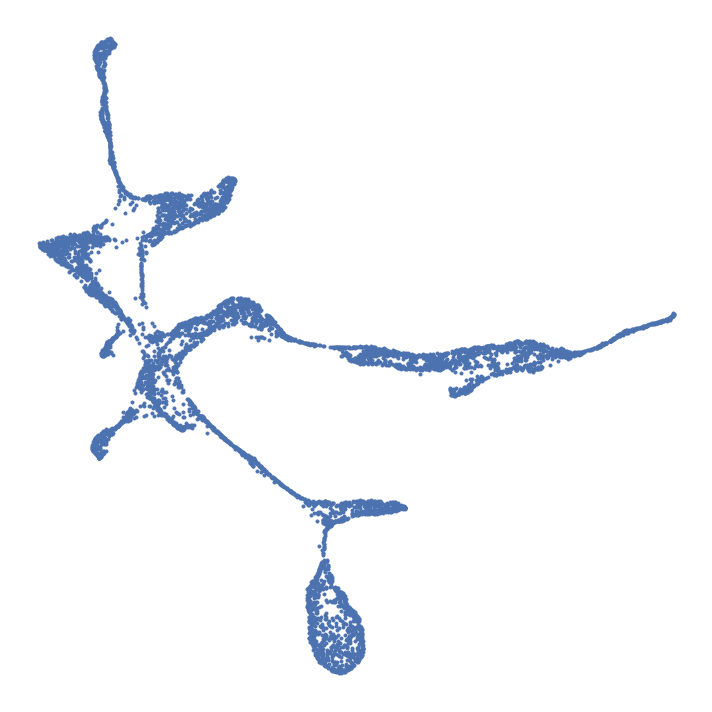

In [13]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(emb[:,0],emb[:,1],s=10)
plt.axis("off")
plt.tight_layout()